### IMPORT LIBRARIES AND DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [2]:
customer_df=pd.read_csv(f"Downloads/archive (25)/Mall_Customers.csv")

In [3]:
customer_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### ANALYSIS

In [4]:
customer_df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
customer_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### DATA VISUALIZATION 

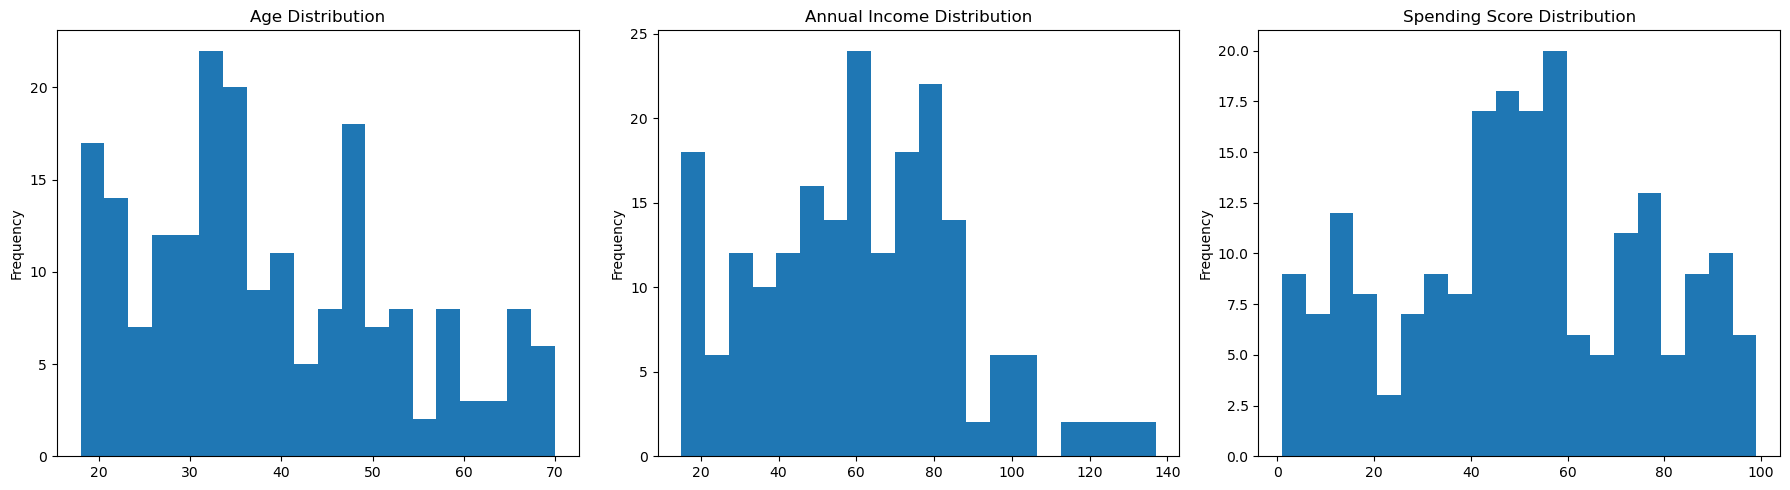

In [6]:

# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Plot histograms for Age, Annual Income, and Spending Score
customer_df['Age'].plot(kind='hist', bins=20, ax=axes[0], title='Age Distribution')
customer_df['Annual Income (k$)'].plot(kind='hist', bins=20, ax=axes[1], title='Annual Income Distribution')
customer_df['Spending Score (1-100)'].plot(kind='hist', bins=20, ax=axes[2], title='Spending Score Distribution')

# Display the plots
plt.tight_layout()
plt.show()

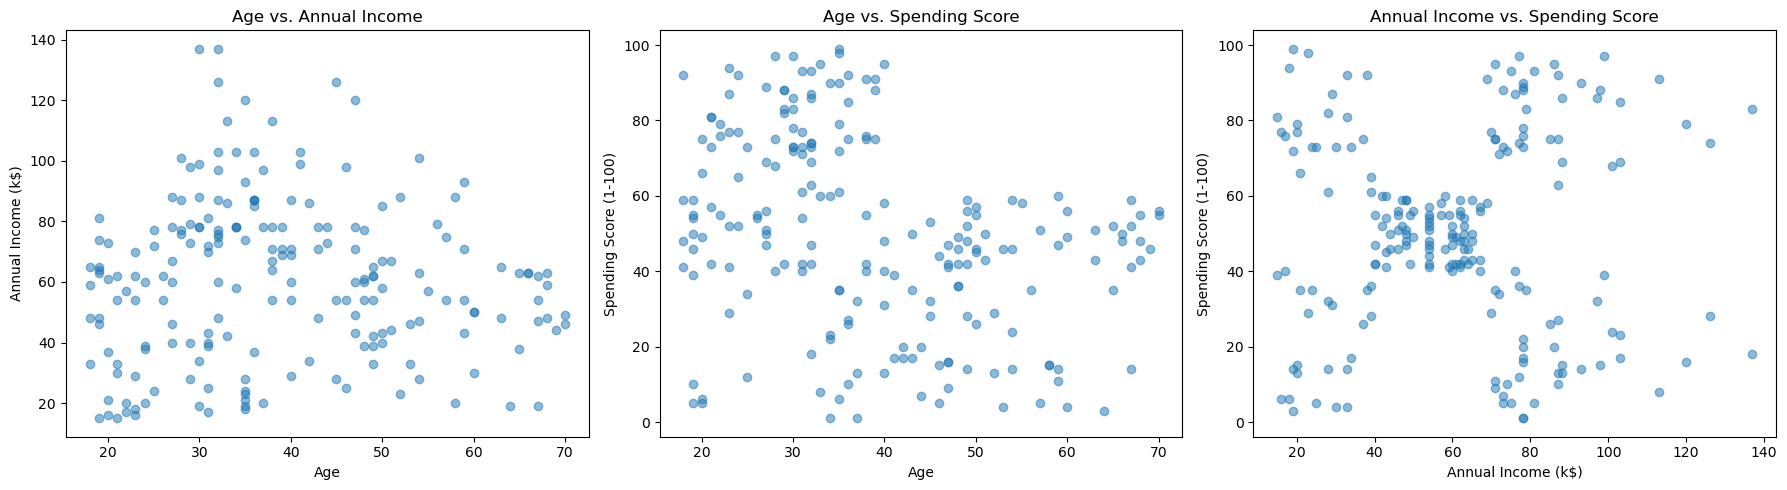

In [7]:

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))


axes[0].scatter(customer_df['Age'], customer_df['Annual Income (k$)'], alpha=0.5)
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Annual Income (k$)')
axes[0].set_title('Age vs. Annual Income')

axes[1].scatter(customer_df['Age'], customer_df['Spending Score (1-100)'], alpha=0.5)
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Spending Score (1-100)')
axes[1].set_title('Age vs. Spending Score')

axes[2].scatter(customer_df['Annual Income (k$)'], customer_df['Spending Score (1-100)'], alpha=0.5)
axes[2].set_xlabel('Annual Income (k$)')
axes[2].set_ylabel('Spending Score (1-100)')
axes[2].set_title('Annual Income vs. Spending Score')

plt.tight_layout()
plt.show()

### DATA PRE PROCESSING

In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

customer_df['Gender'] = label_encoder.fit_transform(customer_df['Gender'])

print(customer_df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1       1   19                  15                      39
1           2       1   21                  15                      81
2           3       0   20                  16                       6
3           4       0   23                  16                      77
4           5       0   31                  17                      40


In [9]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Standardize the numerical features (Age, Annual Income, Spending Score)
num_features = ["Annual Income (k$)", 'Spending Score (1-100)']
customer_df[num_features] = scaler.fit_transform(customer_df[num_features])

# Display the first few rows of the DataFrame after standardization
print(customer_df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1       1   19           -1.738999               -0.434801
1           2       1   21           -1.738999                1.195704
2           3       0   20           -1.700830               -1.715913
3           4       0   23           -1.700830                1.040418
4           5       0   31           -1.662660               -0.395980


### determining optimum clusters

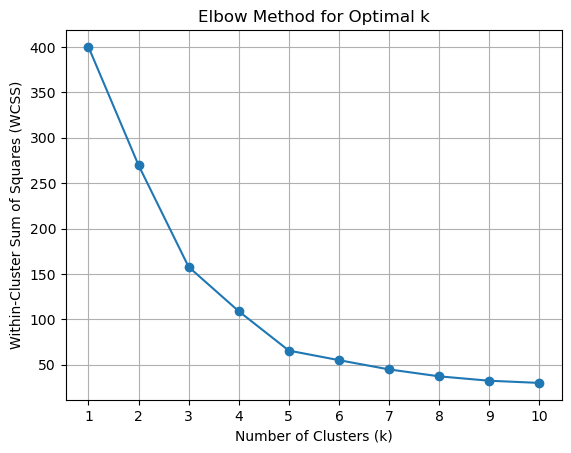

In [11]:
from sklearn.cluster import KMeans
import numpy as np

X = customer_df[['Annual Income (k$)', 'Spending Score (1-100)']]

wcss = []

k_range = range(1, 11)


for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(k_range, wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.xticks(np.arange(1, 11, step=1))
plt.grid(True)
plt.show()

### BUILDING MODEL

In [12]:
kmeans = KMeans(n_clusters=5, random_state=42)
customer_df['Cluster'] = kmeans.fit_predict(X)

print(customer_df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1       1   19           -1.738999               -0.434801   
1           2       1   21           -1.738999                1.195704   
2           3       0   20           -1.700830               -1.715913   
3           4       0   23           -1.700830                1.040418   
4           5       0   31           -1.662660               -0.395980   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


### MODEL EVALUATION

In [13]:
from sklearn.metrics import silhouette_score

# Compute the silhouette score
silhouette_avg = silhouette_score(X, customer_df['Cluster'])
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5546571631111091


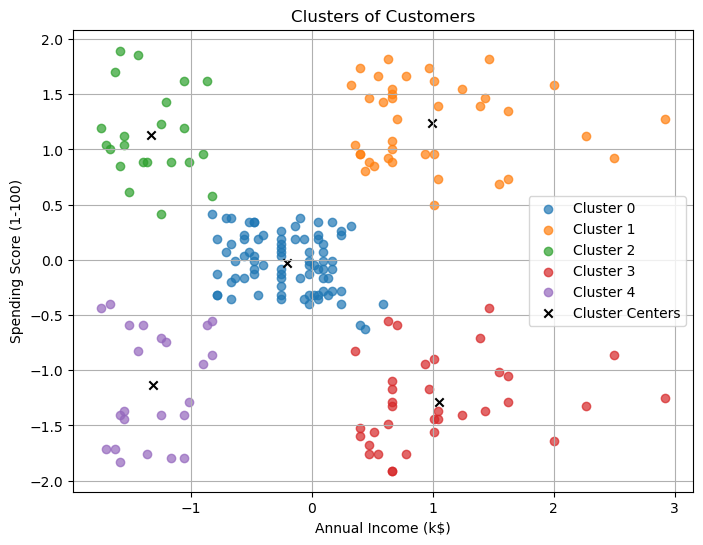

In [14]:
# Set up the figure and axes
plt.figure(figsize=(8, 6))

# Plot data points with colors based on cluster labels
for cluster_label in range(5):
    cluster_data = X[customer_df['Cluster'] == cluster_label]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
                label=f'Cluster {cluster_label}', alpha=0.7)

# Plot cluster centers
cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], color='black', marker='x', label='Cluster Centers')

# Set plot labels and title
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters of Customers')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
# Define a function to predict cluster assignment for user input
def predict_cluster(kmeans_model):
    # Ask the user to input age, annual income, and spending score
    income = float(input("Enter your annual income (in k$): "))
    spending_score = float(input("Enter your spending score (1-100): "))

    # Preprocess the input data (standardize numerical features)
    input_data = scaler.transform([[income, spending_score]])
    # Predict the cluster assignment for the input data
    cluster = kmeans_model.predict(input_data)[0]

    # Display the predicted cluster to the user
    print("Based on your inputs, you belong to Cluster:", cluster)

# Call the function to predict cluster assignment for user input
predict_cluster(kmeans)


Enter your annual income (in k$):  15
Enter your spending score (1-100):  81


Based on your inputs, you belong to Cluster: 2
